In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

Using Theano backend.


In [2]:
from keras import optimizers

In [3]:
# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=9, activation='relu'))
    model.add(Dense(9, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model

In [4]:
class_weight = {0 : 1.,
    1: 20.}

In [5]:
seed=42

In [6]:
np.random.seed(seed)

In [7]:
import pandas as pd
dfb = pd.read_csv("wbc.csv")

In [8]:
dfb=dfb[dfb.bare_nuclei!='?']
dfb['bare_nuclei']=dfb['bare_nuclei'].astype(object).astype(int)
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       683 non-null int64
cell_size             683 non-null int64
cell_shape            683 non-null int64
marginal_adhesion     683 non-null int64
epitelial_cellsize    683 non-null int64
bare_nuclei           683 non-null int32
bland_chromatin       683 non-null int64
normal_nucleoli       683 non-null int64
mitoses               683 non-null int64
jenis                 683 non-null int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


In [9]:
X = dfb.drop([dfb.columns[-1]], axis=1)
y = dfb.jenis.map({2: 0, 4: 1})

In [10]:
print (type(X))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [12]:
y_train = np_utils.to_categorical(y_train)

In [13]:
y_test = np_utils.to_categorical(y_test)
#y_test.shape

In [14]:
print (type(y_train))
print (type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print (type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [14]:
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=10, class_weight=None, verbose=0)

In [15]:
scores1=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [16]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9453 (+/- 0.0593)


In [17]:
scores2=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10, scoring='precision')

In [18]:
print("Precision: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Precision: 0.9224 (+/- 0.1172)


In [19]:
scores3=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10, scoring='recall')

In [20]:
print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

Recall: 0.9494 (+/- 0.1167)


In [21]:
scores4=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10, scoring='f1')

In [22]:
print("F1-score: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

F1-score: 0.9290 (+/- 0.0511)


In [54]:
model.fit(X_train.as_matrix(), y_train, epochs= 10, class_weight = None)

In [55]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import metrics

In [56]:
y_pred = model.predict(X_test.as_matrix())
y_pred= np_utils.to_categorical(y_pred)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9827
Precision: 0.9620
Recall: 0.9870
F1: 0.9744


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test,1), np.argmax(y_pred,1))

array([[151,   3],
       [  1,  76]])

In [59]:
classifier=model

In [60]:
names='MLP-Dataset A'

In [61]:
score=model.predict_proba(X_test.as_matrix())

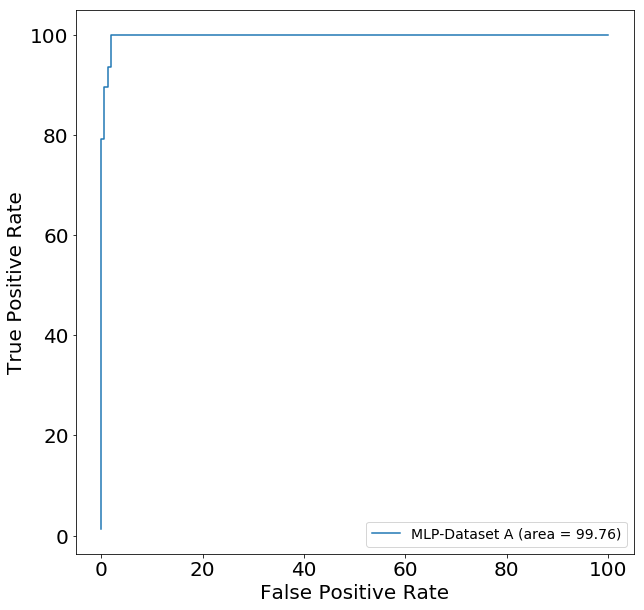

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fpr, tpr, thresholds = roc_curve((np.argmax(y_test,1)), score[:,1])
auc = roc_auc_score((np.argmax(y_test,1)), score[:,1])
plt.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names, auc*100))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(prop={'size':14})
ax.set_xlabel('False Positive Rate',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
plt.show()

In [18]:
model.fit(X_train.as_matrix(), y_train, epochs= 50, class_weight = class_weight)

Epoch 1/50
468/468 [==============================] - 0s - loss: 0.4991 - acc: 0.9038     
Epoch 2/50
468/468 [==============================] - 0s - loss: 0.4769 - acc: 0.9081     
Epoch 3/50
468/468 [==============================] - 0s - loss: 0.4299 - acc: 0.9167     
Epoch 4/50
468/468 [==============================] - 0s - loss: 0.3914 - acc: 0.9274     
Epoch 5/50
468/468 [==============================] - 0s - loss: 0.3810 - acc: 0.9124     
Epoch 6/50
468/468 [==============================] - 0s - loss: 0.3816 - acc: 0.9338     

In [19]:
y_predtr = model.predict_classes(X_train.as_matrix())
y_predtr= np_utils.to_categorical(y_predtr)

 32/468 [=>............................] - ETA: 0s

In [20]:
accuracy = accuracy_score(y_train, y_predtr)
precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_predtr)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9615
Precision: 0.9011
Recall: 1.0000
F1: 0.9480


In [21]:
model.fit(X_train.as_matrix(), y_train, epochs= 100, class_weight = class_weight)

Epoch 1/100
468/468 [==============================] - 0s - loss: 0.4360 - acc: 0.9274     
Epoch 2/100
468/468 [==============================] - 0s - loss: 0.3665 - acc: 0.9338     
Epoch 3/100
468/468 [==============================] - 0s - loss: 0.1720 - acc: 0.9637     
Epoch 4/100
468/468 [==============================] - 0s - loss: 0.1785 - acc: 0.9722     
Epoch 5/100
468/468 [==============================] - 0s - loss: 0.1753 - acc: 0.9679     
Epoch 6/100
468/468 [==============================] - 0s - loss: 0.1567 - acc: 0.9679     

In [22]:
y_predtr = model.predict_classes(X_train.as_matrix())
y_predtr= np_utils.to_categorical(y_predtr)
accuracy = accuracy_score(y_train, y_predtr)
precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_predtr)
print ()
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

 32/468 [=>............................] - ETA: 0s()
Akurasi: 0.9765
Precision: 0.9371
Recall: 1.0000
F1: 0.9676


In [23]:
model.fit(X_train.as_matrix(), y_train, epochs= 200, class_weight = class_weight)

Epoch 1/200
468/468 [==============================] - 0s - loss: 0.1230 - acc: 0.9765     
Epoch 2/200
468/468 [==============================] - 0s - loss: 0.1201 - acc: 0.9765     
Epoch 3/200
468/468 [==============================] - 0s - loss: 0.1225 - acc: 0.9765     
Epoch 4/200
468/468 [==============================] - 0s - loss: 0.1150 - acc: 0.9786     
Epoch 5/200
468/468 [==============================] - 0s - loss: 0.1186 - acc: 0.9765     
Epoch 6/200
468/468 [==============================] - 0s - loss: 0.1136 - acc: 0.9808     

In [24]:
y_predtr = model.predict_classes(X_train.as_matrix())
y_predtr= np_utils.to_categorical(y_predtr)
accuracy = accuracy_score(y_train, y_predtr)
precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_predtr)
print ()
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

 32/468 [=>............................] - ETA: 0s()
Akurasi: 0.9679
Precision: 0.9162
Recall: 1.0000
F1: 0.9563


In [13]:
model.fit(X_train.as_matrix(), y_train, epochs= 500, class_weight = class_weight)

Epoch 1/500
468/468 [==============================] - 0s - loss: 1.8835 - acc: 0.3419     
Epoch 2/500
468/468 [==============================] - 0s - loss: 1.1755 - acc: 0.3504     
Epoch 3/500
468/468 [==============================] - 0s - loss: 0.9095 - acc: 0.4380     
Epoch 4/500
468/468 [==============================] - 0s - loss: 0.7410 - acc: 0.6581     
Epoch 5/500
468/468 [==============================] - 0s - loss: 0.6476 - acc: 0.8205     
Epoch 6/500
468/468 [==============================] - 0s - loss: 0.5574 - acc: 0.8825     

In [16]:
y_predtr = model.predict_classes(X_train.as_matrix())
y_predtr= np_utils.to_categorical(y_predtr)
accuracy = accuracy_score(y_train, y_predtr)
precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_predtr)
print ()
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

 32/468 [=>............................] - ETA: 0s()
Akurasi: 0.9829
Precision: 0.9535
Recall: 1.0000
F1: 0.9762
